In [38]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import matplotlib.pyplot as plt

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [40]:
def GradientBooster(param_grid, n_jobs, X_train, y_train):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(n_splits=10, train_size=0.8, test_size=0.2, random_state=0)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print('best estimator found by grid search: {}'.format(classifier.best_estimator_))
    return cv, classifier.best_estimator_


In [41]:
X_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/training-sets/X_df-file-1-190719_Hela_Ecoli_1to1_07-recalibrated.pkl')
y_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/experiments/190719_Hela_Ecoli/training-sets/y_df-file-1-190719_Hela_Ecoli_1to1_07-recalibrated.pkl')

In [63]:
X_df.columns

Index(['theoretical_mz', 'experiment_average_scan', 'experiment_average_rt'], dtype='object')

In [42]:
y_df.columns

Index(['run_average_mz', 'run_average_scan', 'run_average_rt'], dtype='object')

In [59]:
X = X_df.values
y_mz = y_df.run_average_mz.values
y_scan = y_df.run_average_scan.values
y_rt = y_df.run_average_rt.values

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_mz_train, y_mz_test = train_test_split(X, y_mz, test_size=0.1)
X_train, X_test, y_scan_train, y_scan_test = train_test_split(X, y_scan, test_size=0.1)
X_train, X_test, y_rt_train, y_rt_test = train_test_split(X, y_rt, test_size=0.1)

In [62]:
print(X_train.shape, X_test.shape, y_mz_train.shape, y_mz_test.shape)

(14795, 3) (1644, 3) (14795,) (1644,)


In [48]:
# search for the best model in the specified hyperparameter space
param_grid = {'n_estimators':[100], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth':[20, 10, 6, 4], 'min_samples_leaf':[3, 5, 9, 17], 'max_features':[1.0, 0.3, 0.1] }
n_jobs = 4
cv, best_estimator = GradientBooster(param_grid, n_jobs, X_train, y_train)

best estimator found by grid search: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=20,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [49]:
# use the best parameters to train the model
best_estimator.fit(X_train, y_train)
print("R-squared for training set (best model found): {}".format(best_estimator.score(X_train, y_train)))

R-squared for training set (best model found): 0.9999978497035882


In [50]:
# use the trained model to predict the m/z for the test set
y_test_predicted = best_estimator.predict(X_test)

In [51]:
y_test_predicted

array([ 669.776436  , 1351.72965905,  771.72901738, ...,  960.49251053,
        791.75572751,  774.4082706 ])

In [52]:
y_test

array([ 669.86019578, 1350.30155393,  771.69901428, ...,  960.49705021,
        791.87314499,  774.39140752])

In [53]:
y_test_delta = y_test_predicted - y_test

In [58]:
np.std(y_test_delta)

0.3930033520936814

In [54]:
abs(y_test_delta).max()

10.84248362090807

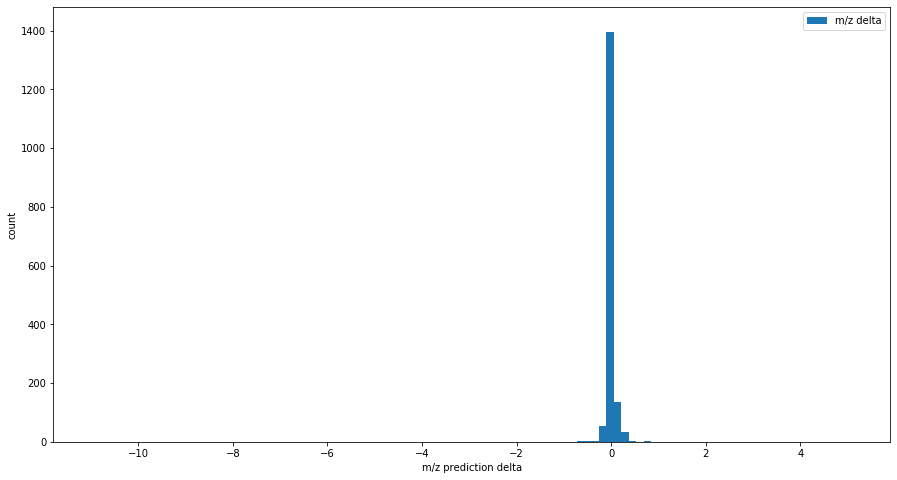

In [55]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 100
hist, bins, _ = plt.hist(y_test_delta, bins=bins, label='m/z delta')
plt.legend(loc='best')
plt.xlabel('m/z prediction delta')
plt.ylabel('count')

plt.show()